In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

tf.__version__

'2.1.0'

In [3]:
(_, _), (X, y) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X = np.expand_dims(X, -1)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=42)

# Tracking learning

## Plot the learning curves

In [15]:
# define model arch
model = Sequential()

model.add(Conv2D(50, kernel_size=3, input_shape=(28, 28, 1), padding='same',
                 activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(50, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=2)

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=256,
          callbacks=[early_stop],
          verbose=2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 - 3s - loss: 13.4370 - accuracy: 0.5244 - val_loss: 0.7855 - val_accuracy: 0.7206
Epoch 2/10
7200/7200 - 2s - loss: 0.6528 - accuracy: 0.7667 - val_loss: 0.6245 - val_accuracy: 0.7822
Epoch 3/10
7200/7200 - 2s - loss: 0.4979 - accuracy: 0.8199 - val_loss: 0.5404 - val_accuracy: 0.8228
Epoch 4/10
7200/7200 - 2s - loss: 0.4066 - accuracy: 0.8526 - val_loss: 0.5313 - val_accuracy: 0.8244
Epoch 5/10
7200/7200 - 2s - loss: 0.3535 - accuracy: 0.8690 - val_loss: 0.4690 - val_accuracy: 0.8444
Epoch 6/10
7200/7200 - 2s - loss: 0.3274 - accuracy: 0.8778 - val_loss: 0.4996 - val_accuracy: 0.8356
Epoch 7/10
7200/7200 - 2s - loss: 0.2908 - accuracy: 0.8897 - val_loss: 0.4793 - val_accuracy: 0.8456
Epoch 8/10
7200/7200 - 2s - loss: 0.2508 - accuracy: 0.9069 - val_loss: 0.5200 - val_accuracy: 0.8372
Epoch 9/10
7200/7200 - 2s - loss: 0.2177 - accuracy: 0.9207 - val_loss: 0.5041 - val_accuracy: 0.8489
Epoch 10/10
7200/7200 - 2s - loss

In [17]:
print(f'test acc: {model.evaluate(X_test, y_test)[1]: .1%}')

1000/1000 [==============================] - 0s 260us/sample - loss: 0.5086 - accuracy: 0.8310
test acc:  83.1%


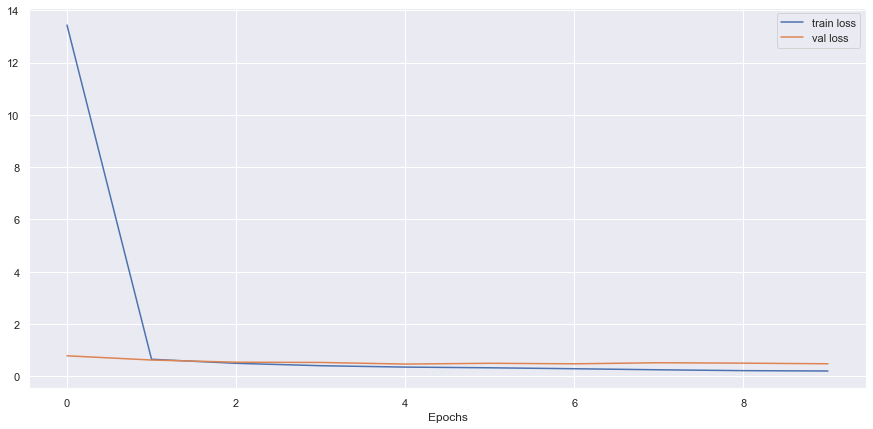

In [20]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['val_loss'], label='val loss')
ax.set(xlabel='Epochs')

plt.legend()
plt.show()

# Regularization

## Add dropout to your network

In [23]:
# define model arch 
model = Sequential()

model.add(Conv2D(50, kernel_size=3, input_shape=(28, 28, 1), padding='same',
                 activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(50, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# callbacks
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=2)
save_model = ModelCheckpoint('best_model_19-4.hdf5',
                             monitor='val_accuracy')

# fit
history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=256,
          callbacks=[early_stop],
          verbose=2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 - 8s - loss: 9.1721 - accuracy: 0.5539 - val_loss: 0.7227 - val_accuracy: 0.7483
Epoch 2/10
7200/7200 - 6s - loss: 0.5868 - accuracy: 0.7900 - val_loss: 0.5434 - val_accuracy: 0.8211
Epoch 3/10
7200/7200 - 6s - loss: 0.4207 - accuracy: 0.8508 - val_loss: 0.4596 - val_accuracy: 0.8372
Epoch 4/10
7200/7200 - 6s - loss: 0.3294 - accuracy: 0.8771 - val_loss: 0.4393 - val_accuracy: 0.8472
Epoch 5/10
7200/7200 - 6s - loss: 0.2647 - accuracy: 0.9022 - val_loss: 0.4555 - val_accuracy: 0.8444
Epoch 6/10
7200/7200 - 6s - loss: 0.2146 - accuracy: 0.9186 - val_loss: 0.4584 - val_accuracy: 0.8494
Epoch 7/10
7200/7200 - 6s - loss: 0.1835 - accuracy: 0.9318 - val_loss: 0.4926 - val_accuracy: 0.8517
Epoch 8/10
7200/7200 - 6s - loss: 0.1700 - accuracy: 0.9385 - val_loss: 0.5101 - val_accuracy: 0.8356
Epoch 9/10
7200/7200 - 6s - loss: 0.1360 - accuracy: 0.9504 - val_loss: 0.5839 - val_accuracy: 0.8406


In [24]:
print(f'test acc: {model.evaluate(X_test, y_test)[1]: .1%}')

1000/1000 [==============================] - 0s 418us/sample - loss: 0.5899 - accuracy: 0.8340
test acc:  83.4%


## Add batch normalization to your network

In [25]:
# define model arch 
model = Sequential()

model.add(Conv2D(50, kernel_size=3, input_shape=(28, 28, 1), padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(50, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# callbacks
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=2)
save_model = ModelCheckpoint('best_model_19-4.hdf5',
                             monitor='val_accuracy')

# fit
history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=256,
          callbacks=[early_stop],
          verbose=2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 - 6s - loss: 1.7213 - accuracy: 0.6750 - val_loss: 1.0035 - val_accuracy: 0.7694
Epoch 2/10
7200/7200 - 5s - loss: 0.3998 - accuracy: 0.8619 - val_loss: 0.4938 - val_accuracy: 0.8461
Epoch 3/10
7200/7200 - 5s - loss: 0.2413 - accuracy: 0.9171 - val_loss: 0.4360 - val_accuracy: 0.8656
Epoch 4/10
7200/7200 - 5s - loss: 0.1651 - accuracy: 0.9431 - val_loss: 0.4297 - val_accuracy: 0.8617
Epoch 5/10
7200/7200 - 5s - loss: 0.1462 - accuracy: 0.9506 - val_loss: 0.4757 - val_accuracy: 0.8517


In [26]:
print(f'test acc: {model.evaluate(X_test, y_test)[1]: .1%}')

1000/1000 [==============================] - 0s 448us/sample - loss: 0.5520 - accuracy: 0.8300
test acc:  83.0%


# Interpreting the model

## Extracting a kernel from a trained network

In [48]:
# get the first conv layer from the model
c1 = model.layers[0]

# get the weights of the first conv layer
weights1 = c1.get_weights()

# pull out the first channel of the second kernel in the first layer
kernel = weights1[0][:, :, 0, 1]
print(kernel)

[[ 0.1082665  -0.02863615 -0.04195122]
 [-0.08248423  0.02094198  0.01193562]
 [-0.02038379 -0.02849565  0.08172981]]


## Visualizing kernel responses

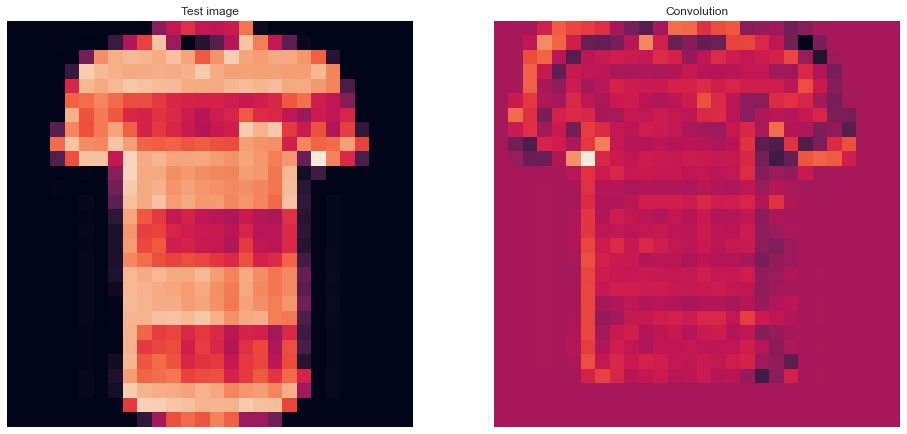

In [54]:
# convolve the extracted kernel with the sixth image in the test data
im = X_test[6, :, :, 0]
out = np.zeros(im.shape)

# convolve
for ii in range(out.shape[0] - 3):
    for jj in range(out.shape[1] - 3):
        out[ii, jj] = (kernel * im[ii:ii+3, jj:jj+3]).sum()
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(im)
ax2.imshow(out)
ax1.set(title='Test image')
ax2.set(title='Convolution')
ax1.axis('off')
ax2.axis('off')

plt.show()